In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("training_data_filtered.csv")

# Quick overview
print(df.shape)
print(df.info())
df.head()

(275, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   username                   275 non-null    object 
 1   MeanMoves                  275 non-null    float64
 2   StdMoves                   275 non-null    float64
 3   MeanEloDiff                275 non-null    float64
 4   WinRate                    275 non-null    float64
 5   WinRate_PosEloDiff         268 non-null    float64
 6   WinRate_NegEloDiff         270 non-null    float64
 7   Mean_ACPL                  275 non-null    float64
 8   Std_ACPL                   275 non-null    float64
 9   Mean_Game_ACPL_Variance    275 non-null    float64
 10  After_opening_ACPL         275 non-null    float64
 11  Mean_Material_Imbalance    275 non-null    float64
 12  Std_Material_Imbalance     275 non-null    float64
 13  FightingCapability         275 non-null 

,username,MeanMoves,StdMoves,MeanEloDiff,WinRate,WinRate_PosEloDiff,WinRate_NegEloDiff,Mean_ACPL,Std_ACPL,Mean_Game_ACPL_Variance,After_opening_ACPL,Mean_Material_Imbalance,Std_Material_Imbalance,FightingCapability,n_loss_games,ComebackIndex,n_loss_games_for_comeback,CollapseIndex,n_win_games
0,2700172,37.2500,15.813496,15.6250,31.250,40.000000,16.666667,41.634441,15.497523,10375.459178,60.784021,0.200334,0.909769,0.443704,9,0.111111,9,0.333333,6
1,ab2,32.3750,13.657110,-40.9375,50.000,20.000000,63.636364,67.655322,29.924376,16658.362732,121.316346,0.134083,2.213617,0.394320,8,0.250000,8,0.400000,10
2,abun,51.4375,16.997917,-86.0625,65.625,50.000000,72.727273,50.033267,23.517168,11244.789733,55.871285,0.738678,2.869781,0.511599,10,0.500000,10,0.111111,9
3,adririen,25.9375,10.592253,44.8125,50.000,50.000000,50.000000,49.980010,21.932663,9127.782659,123.993885,-0.003445,1.039008,0.257923,8,0.125000,8,0.111111,9
4,acewestfall,21.5625,8.294325,69.0000,37.500,38.461538,50.000000,59.182647,38.007323,11673.001501,89.691277,-0.291369,1.276952,0.320399,8,0.125000,8,0.285714,7


In [2]:
import pandas as pd

# --- Load data ---
df = pd.read_csv("training_data_filtered.csv")

# --- Drop rows with any null values ---
df_cleaned = df.dropna().reset_index(drop=True)

# --- Save cleaned dataset ---
df_cleaned.to_csv("training_data_filtered.csv", index=False)

print(f"✅ Cleaned data saved: {len(df_cleaned)} rows remain after removing NaN values.")


✅ Cleaned data saved: 263 rows remain after removing NaN values.


In [4]:
# Convert percentage win rates to decimals
for col in ['WinRate', 'WinRate_PosEloDiff', 'WinRate_NegEloDiff']:
    df[col] = df[col] / 100

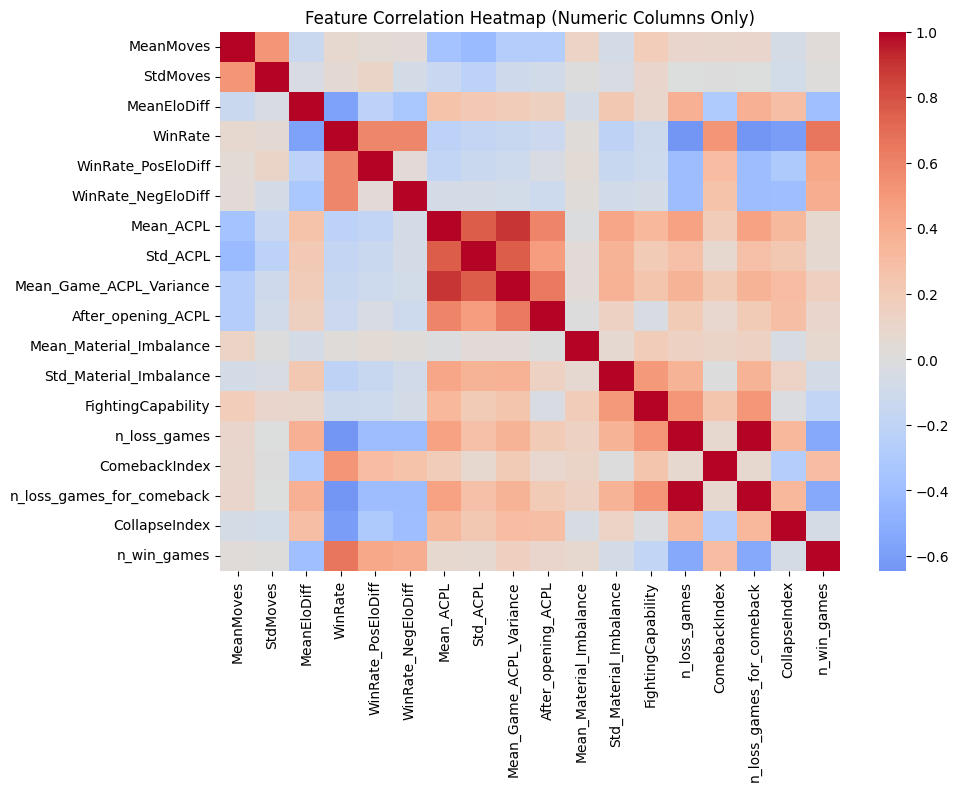

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Compute and plot correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap (Numeric Columns Only)")
plt.show()


In [7]:
corr_matrix = numeric_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("Highly correlated features:", to_drop)

print(to_drop)

Highly correlated features: ['Mean_Game_ACPL_Variance', 'n_loss_games_for_comeback']
['Mean_Game_ACPL_Variance', 'n_loss_games_for_comeback']


In [8]:
# Drop the username column since it's not a numeric feature
df = df.drop(columns=['n_loss_games_for_comeback','Mean_Game_ACPL_Variance','username'])

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [11]:
df_scaled['WinRate_PosEloDiff'].fillna(df['WinRate_PosEloDiff'].mean(), inplace=True)
df_scaled['WinRate_NegEloDiff'].fillna(df['WinRate_NegEloDiff'].mean(), inplace=True)
df_scaled['After_opening_ACPL'].fillna(df['After_opening_ACPL'].mean(), inplace=True)

C:\Users\Prakul\AppData\Local\Temp\ipykernel_31456\2469000275.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_scaled['WinRate_PosEloDiff'].fillna(df['WinRate_PosEloDiff'].mean(), inplace=True)
C:\Users\Prakul\AppData\Local\Temp\ipykernel_31456\2469000275.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [12]:
df_scaled.to_csv("training_data_cleaned.csv", index=False)